In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("training_set_features.csv")

In [4]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
data=data.drop(['employment_occupation','employment_industry','health_insurance'],axis=1)

In [6]:
results=pd.read_csv("training_set_labels.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
results.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [9]:
merged_df = pd.merge(data, results, on='respondent_id', how='inner')


In [10]:
merged_df.dropna()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,0,1
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0


In [11]:
merged_df['employment_status'].nunique()

3

In [12]:
from sklearn.preprocessing import LabelEncoder

# List of columns to label encode
columns_to_encode = ['age_group', 'education', 'race', 'sex', 'income_poverty',
                      'marital_status', 'rent_or_own', 'employment_status',
                      'hhs_geo_region', 'census_msa']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for column in columns_to_encode:
    if column in merged_df.columns:
        merged_df[column] = label_encoder.fit_transform(merged_df[column].astype(str))

# Display the updated DataFrame
print(merged_df.head())


   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0               

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [14]:
target_column = 'h1n1_vaccine'
corr_matrix = merged_df.corr()
corr_with_target = corr_matrix[target_column]
plt.figure(figsize=(120, 80))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=.5)
plt.title(f'Correlation Matrix with {target_column}')
plt.show()


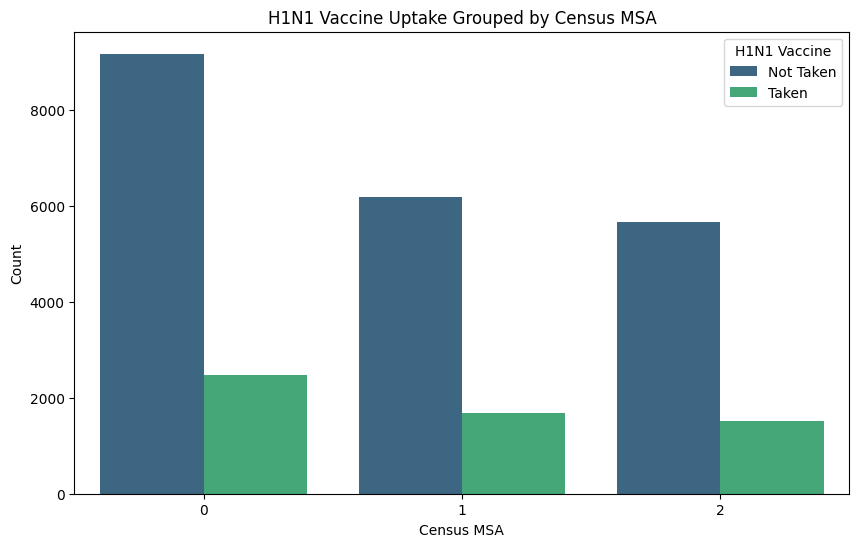

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='census_msa', hue='h1n1_vaccine', data=merged_df, palette='viridis')
plt.title('H1N1 Vaccine Uptake Grouped by Census MSA')
plt.xlabel('Census MSA')
plt.ylabel('Count')
plt.legend(title='H1N1 Vaccine', labels=['Not Taken', 'Taken'])
plt.show()

<Figure size 1000x600 with 0 Axes>

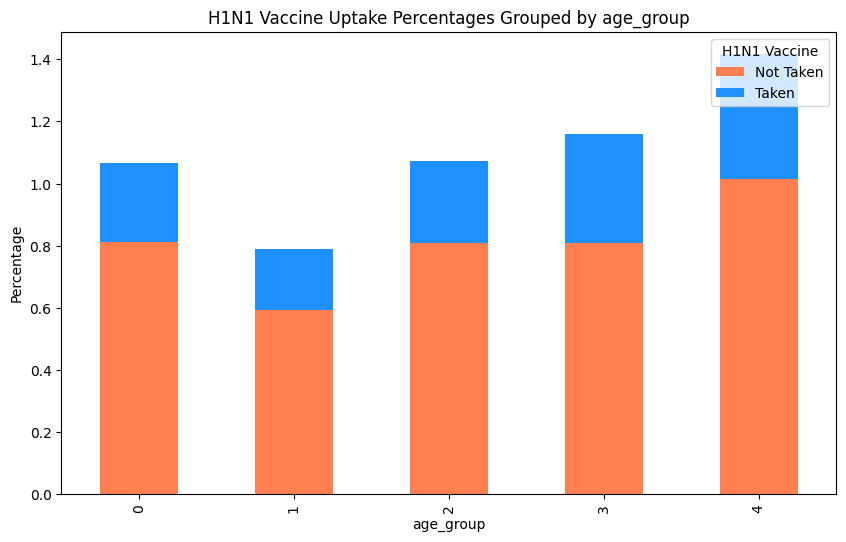

In [16]:
def plot_vaccine_by_category(df, category_column):
    plt.figure(figsize=(10, 6))
    percentages_df = df.groupby([category_column, 'h1n1_vaccine']).size().unstack() / df.groupby(category_column).size()
    percentages_df.plot(kind='bar', stacked=True, color=['#FF7F50', '#1E90FF'], figsize=(10, 6))
    plt.title(f'H1N1 Vaccine Uptake Percentages Grouped by {category_column}')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.legend(title='H1N1 Vaccine', labels=['Not Taken', 'Taken'], loc='upper right')

    plt.show()


# Example usage:
# Replace 'census_msa' with the desired category column name (e.g., 'age_group')
plot_vaccine_by_category(merged_df, category_column='age_group')


age_group', 'education', 'race', 'sex', 'income_poverty',
                      'marital_status', 'rent_or_own', 'employment_status',
                      'hhs_geo_region', 'census_msa'

<Figure size 1000x600 with 0 Axes>

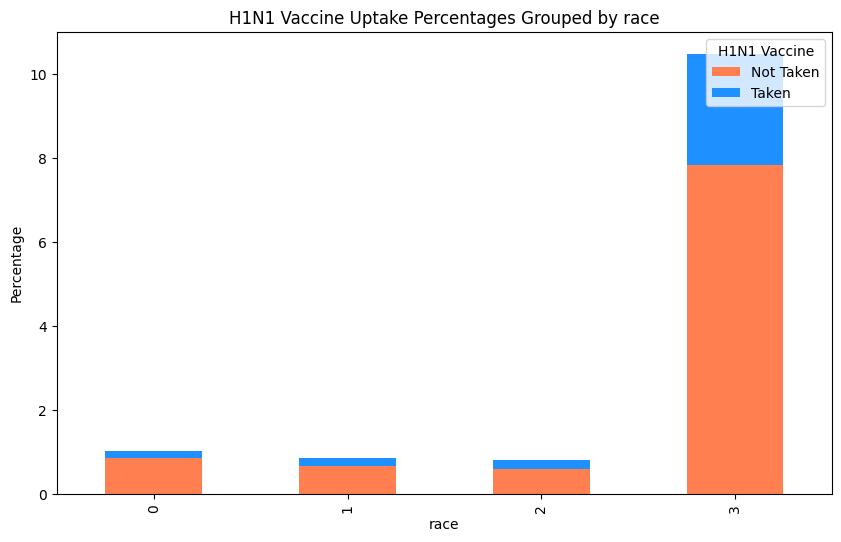

<Figure size 1000x600 with 0 Axes>

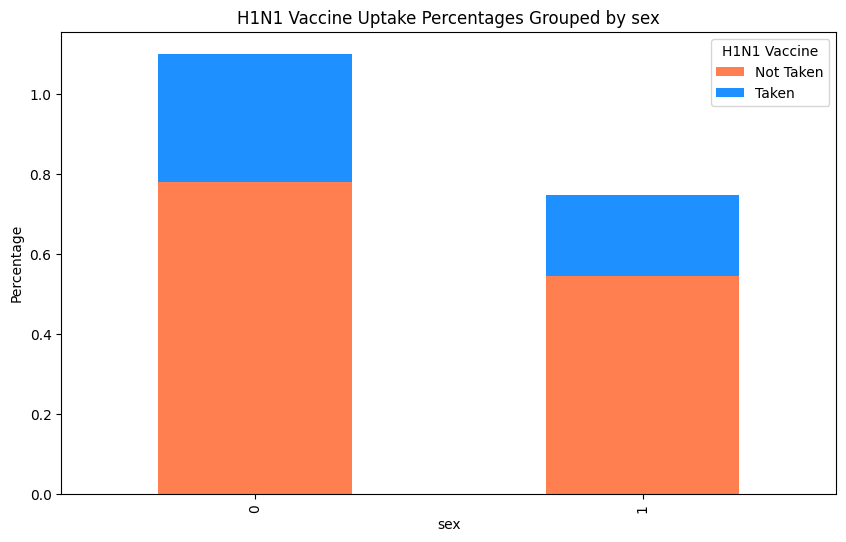

<Figure size 1000x600 with 0 Axes>

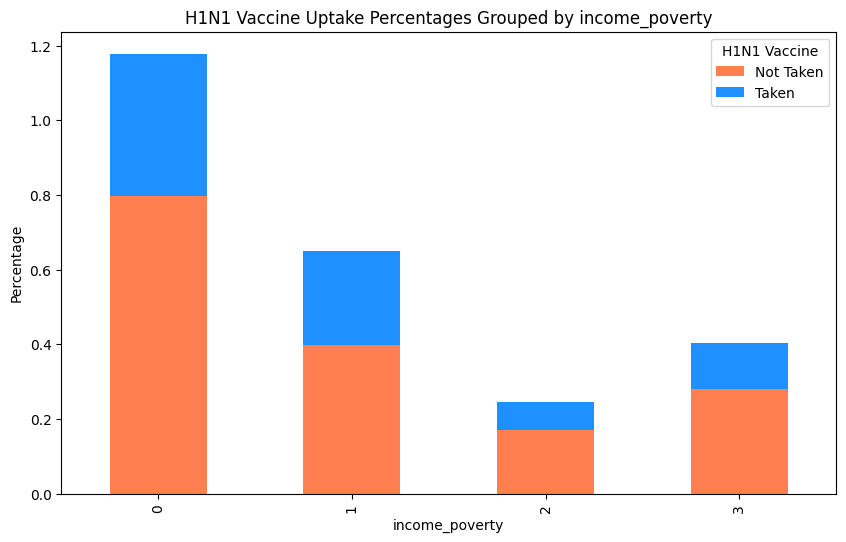

<Figure size 1000x600 with 0 Axes>

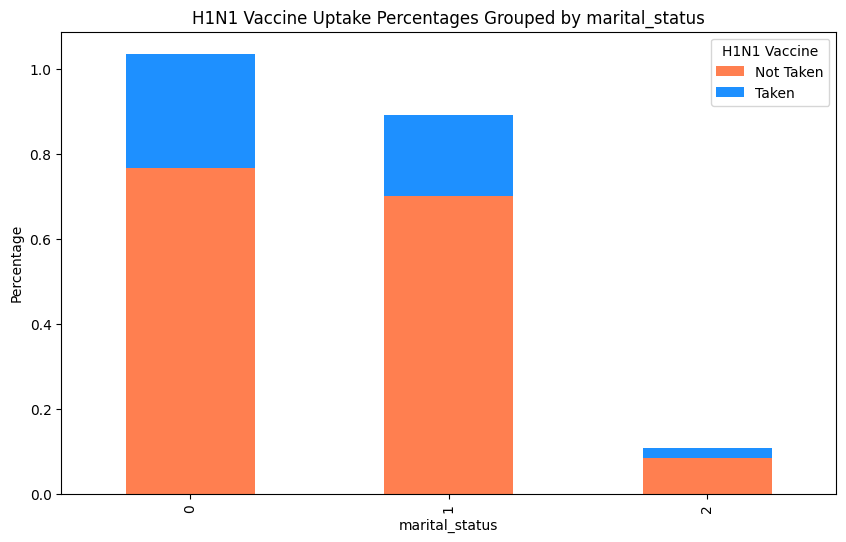

<Figure size 1000x600 with 0 Axes>

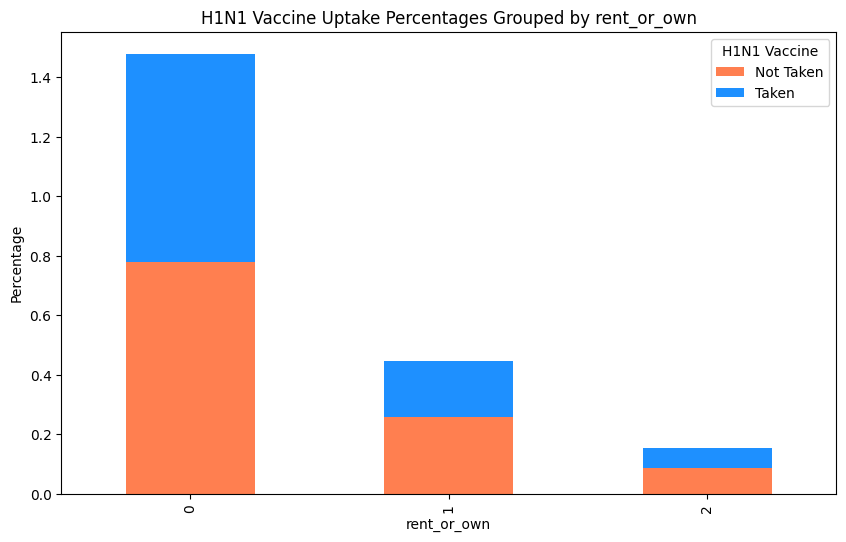

<Figure size 1000x600 with 0 Axes>

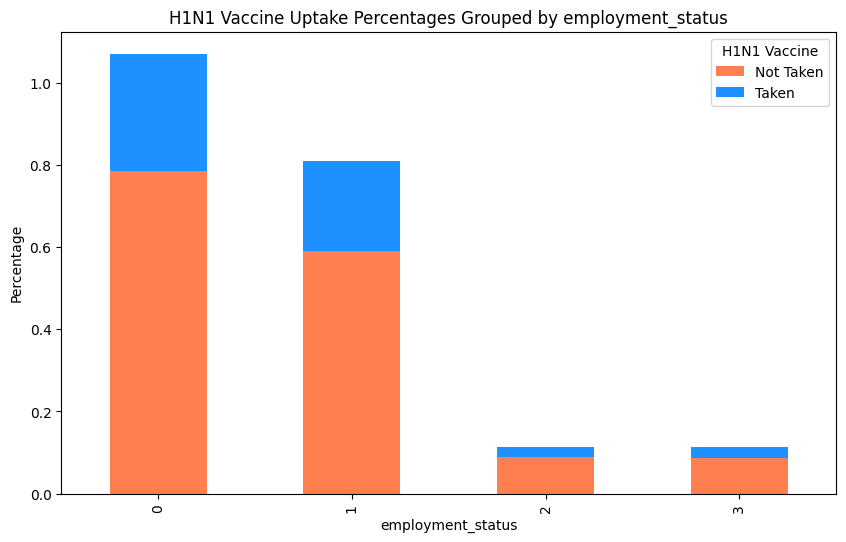

<Figure size 1000x600 with 0 Axes>

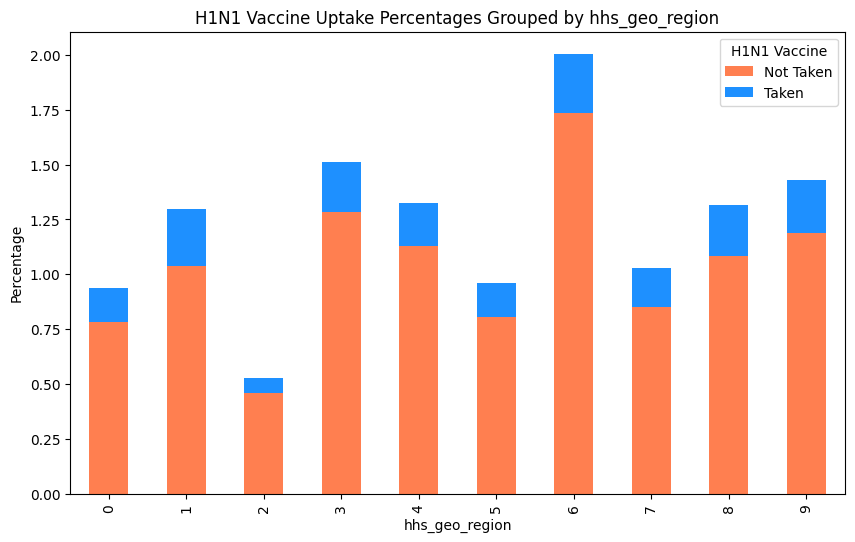

<Figure size 1000x600 with 0 Axes>

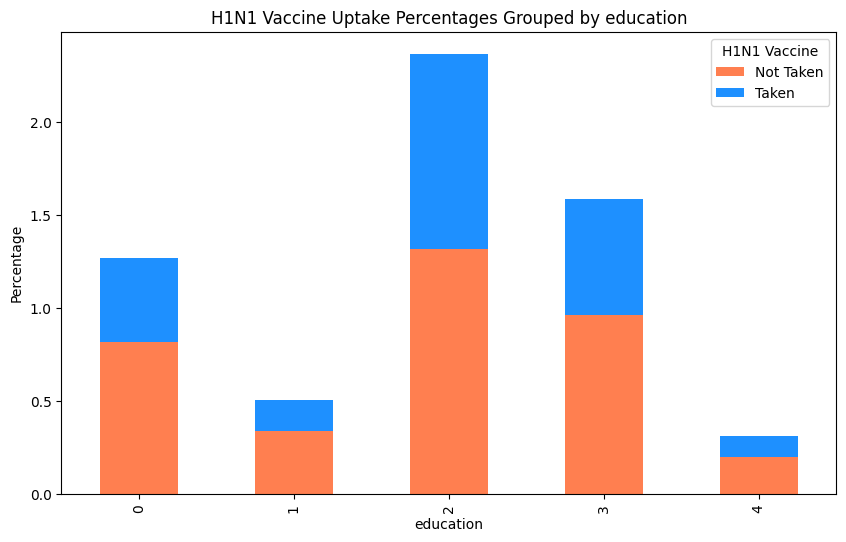

In [17]:
plot_vaccine_by_category(merged_df, category_column='race')
plot_vaccine_by_category(merged_df, category_column='sex')
plot_vaccine_by_category(merged_df, category_column='income_poverty')
plot_vaccine_by_category(merged_df, category_column='marital_status')
plot_vaccine_by_category(merged_df, category_column='rent_or_own')
plot_vaccine_by_category(merged_df, category_column='employment_status')
plot_vaccine_by_category(merged_df, category_column='hhs_geo_region')
plot_vaccine_by_category(merged_df, category_column='education')

In [18]:
target_column = 'h1n1_vaccine'
corr_matrix = merged_df.corr()
corr_with_target = corr_matrix[target_column]
high_corr_columns = corr_with_target[abs(corr_with_target) >= 0.1].index
corr_h1n1_df = merged_df[high_corr_columns]
print(corr_h1n1_df.head())


   h1n1_concern  h1n1_knowledge  doctor_recc_h1n1  doctor_recc_seasonal  \
0           1.0             0.0               0.0                   0.0   
1           3.0             2.0               0.0                   0.0   
2           1.0             1.0               NaN                   NaN   
3           1.0             1.0               0.0                   1.0   
4           2.0             1.0               0.0                   0.0   

   health_worker  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0            0.0                          3.0                1.0   
1            0.0                          5.0                4.0   
2            0.0                          3.0                1.0   
3            0.0                          3.0                3.0   
4            0.0                          3.0                3.0   

   opinion_seas_vacc_effective  opinion_seas_risk  h1n1_vaccine  \
0                          2.0                1.0             0   
1     

In [19]:
target_column = 'seasonal_vaccine'
corr_matrix = merged_df.corr()
corr_with_target = corr_matrix[target_column]
high_corr_columns = corr_with_target[abs(corr_with_target) >=0.1].index
corr_sf_df = merged_df[high_corr_columns]
print(corr_sf_df.head())

   h1n1_concern  h1n1_knowledge  behavioral_wash_hands  behavioral_touch_face  \
0           1.0             0.0                    0.0                    1.0   
1           3.0             2.0                    1.0                    1.0   
2           1.0             1.0                    0.0                    0.0   
3           1.0             1.0                    1.0                    0.0   
4           2.0             1.0                    1.0                    1.0   

   doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  \
0               0.0                   0.0                    0.0   
1               0.0                   0.0                    0.0   
2               NaN                   NaN                    1.0   
3               0.0                   1.0                    1.0   
4               0.0                   0.0                    0.0   

   health_worker  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0            0.0                    

In [20]:
print(corr_sf_df.info())
print(corr_h1n1_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_wash_hands        26665 non-null  float64
 3   behavioral_touch_face        26579 non-null  float64
 4   doctor_recc_h1n1             24547 non-null  float64
 5   doctor_recc_seasonal         24547 non-null  float64
 6   chronic_med_condition        25736 non-null  float64
 7   health_worker                25903 non-null  float64
 8   opinion_h1n1_vacc_effective  26316 non-null  float64
 9   opinion_h1n1_risk            26319 non-null  float64
 10  opinion_seas_vacc_effective  26245 non-null  float64
 11  opinion_seas_risk            26193 non-null  float64
 12  age_group                    26707 non-null  int64  
 13  race            

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier

features = corr_h1n1_df.drop(columns=['h1n1_vaccine','seasonal_vaccine'])
features = features.fillna(features.mean())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, corr_h1n1_df['h1n1_vaccine'], test_size=0.2, random_state=42)

models = {
    'K-Means': KMeans(n_clusters=2),
    'DBSCAN': DBSCAN(),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=2),
    'Gaussian Mixture Model': GaussianMixture(n_components=2),
    'PCA': PCA(n_components=2),
    #'t-SNE': TSNE(n_components=2),
    'Isolation Forest': IsolationForest(),
    'Autoencoder': MLPRegressor(hidden_layer_sizes=(8, 2, 8), max_iter=1000, random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    if name == 'DBSCAN':
        continue
    
    model.fit(X_train, y_train)
    
    if name == 'PCA':
        # Variance explained by the components
        explained_variance = model.explained_variance_ratio_.sum()
        print(f"{name} Explained Variance: {explained_variance}")
    elif name == 'Agglomerative Clustering':
        # Silhouette score for Agglomerative Clustering
        predictions = model.fit_predict(X_test)
        silhouette_avg = silhouette_score(X_test, predictions)
        print(f"{name} Silhouette Score: {silhouette_avg}")
    else:
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions) if name != 'Autoencoder' else 'N/A'
        print(f"{name} Accuracy: {accuracy}")


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Accuracy: 0.7016098839385998
Agglomerative Clustering Silhouette Score: 0.22878320668868335
Gaussian Mixture Model Accuracy: 0.7530887308124298
PCA Explained Variance: 0.44410271068921503
Isolation Forest Accuracy: 0.07225758143017597
Autoencoder Accuracy: N/A
Random Forest Classifier Accuracy: 0.8242231374017222


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier

features = corr_h1n1_df.drop(columns=['h1n1_vaccine','seasonal_vaccine'])
features = features.fillna(features.mean())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, corr_h1n1_df['h1n1_vaccine'], test_size=0.2, random_state=42)

models = {
    #'t-SNE': TSNE(n_components=2),
    'Isolation Forest': IsolationForest(),
    'Autoencoder': MLPRegressor(hidden_layer_sizes=(8, 2, 8), max_iter=1000, random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    if name == 'DBSCAN':
        continue
    
    model.fit(X_train, y_train)
    
    if name == 'PCA':
        # Variance explained by the components
        explained_variance = model.explained_variance_ratio_.sum()
        print(f"{name} Explained Variance: {explained_variance}")
    elif name == 'Agglomerative Clustering':
        # Silhouette score for Agglomerative Clustering
        predictions = model.fit_predict(X_test)
        silhouette_avg = silhouette_score(X_test, predictions)
        print(f"{name} Silhouette Score: {silhouette_avg}")
    else:
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions) if name != 'Autoencoder' else 'N/A'
        print(f"{name} Accuracy: {accuracy}")


Isolation Forest Accuracy: 0.0731935604642456
Autoencoder Accuracy: N/A
Random Forest Classifier Accuracy: 0.8242231374017222


In [23]:
!pip install scikit-learn xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

features = corr_h1n1_df.drop(columns=['h1n1_vaccine','seasonal_vaccine'])
features = features.fillna(features.mean())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, corr_h1n1_df['h1n1_vaccine'], test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, corr_h1n1_df['h1n1_vaccine'], test_size=0.2, random_state=42)

# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

# Gradient Boosting (XGBoost)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
SVM Accuracy: 0.8345189067764882
Logistic Regression Accuracy: 0.8384500187195807
XGBoost Accuracy: 0.8320853612879071


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'features' and 'target' are your feature matrix and target column
# Replace them with the actual names in your dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, corr_h1n1_df['h1n1_vaccine'], test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Evaluate accuracy on the training set
train_predictions = logreg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate accuracy on the testing set
test_predictions = logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.8307044231219284
Testing Accuracy: 0.8384500187195807


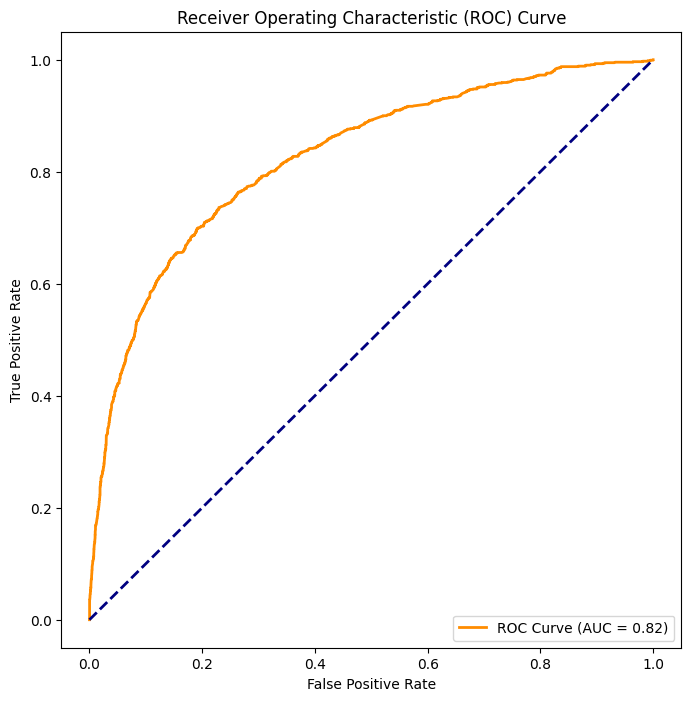

F1 Score: 0.5170677112479015
Confusion Matrix:
[[4017  195]
 [ 668  462]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.41      0.52      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.71      5342
weighted avg       0.82      0.84      0.82      5342



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming 'features' and 'target' are your feature matrix and target column
# Replace them with the actual names in your dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, corr_h1n1_df['h1n1_vaccine'], test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict probabilities and labels
y_prob = logreg_model.predict_proba(X_test)[:, 1]
y_pred = logreg_model.predict(X_test)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'features' and 'target' are your feature matrix and target column
# Replace them with the actual names in your dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, corr_h1n1_df['h1n1_vaccine'], test_size=0.2, random_state=42)

# AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")

# Bagging (Bagged Decision Trees)
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Bagging Accuracy: {bagging_accuracy}")


AdaBoost Accuracy: 0.8369524522650693


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.8210408086858855


In [27]:
!pip install gym numpy tensorflow xgboost

import gym
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assume you have a dataset X_train and y_train for training

# X_train = ...
# y_train = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Adaboost
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)

print(f"Adaboost Accuracy: {adaboost_accuracy}")

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy}")

# You can similarly try other boosting algorithms like LightGBM and CatBoost


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Adaboost Accuracy: 0.8282237304001873
XGBoost Accuracy: 0.8329042827053592


In [28]:
!pip install gym numpy tensorflow xgboost  catboost

import gym
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
import catboost as catb
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assume you have a dataset X_train and y_train for training

# X_train = ...
# y_train = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Adaboost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)

print(f"Adaboost Accuracy: {adaboost_accuracy}")

# Gradient Boosting
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradient_boost_model.fit(X_train, y_train)
gradient_boost_predictions = gradient_boost_model.predict(X_test)
gradient_boost_accuracy = accuracy_score(y_test, gradient_boost_predictions)

print(f"Gradient Boosting Accuracy: {gradient_boost_accuracy}")

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy}")



# CatBoost
catboost_model = catb.CatBoostClassifier(iterations=50, random_state=42, silent=True)
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_predictions)

print(f"CatBoost Accuracy: {catboost_accuracy}")


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Adaboost Accuracy: 0.8253875402164376
Gradient Boosting Accuracy: 0.8253875402164376
XGBoost Accuracy: 0.8233401579409184
CatBoost Accuracy: 0.8227551915764844


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Assume you have a dataset X_train and y_train for training
# X_train = ...
# y_train = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Base models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', random_forest_model), ('svm', svm_model)],
    voting='soft'  # Use 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the accuracy
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', random_forest_model), ('svm', svm_model)],
    final_estimator=DecisionTreeClassifier(random_state=42),
    stack_method='auto',  # Use 'auto' to automatically select the stacking method
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")


Voting Classifier Accuracy: 0.8252285191956125
Stacking Classifier Accuracy: 0.7787934186471663


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assume you have a dataset X_train and y_train for training
# X_train = ...
# y_train = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Base models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('random_forest', random_forest_model)],
    voting='soft'  # Use 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the accuracy
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('random_forest', random_forest_model)],
    final_estimator=LogisticRegression(),
    stack_method='auto',  # Use 'auto' to automatically select the stacking method
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")


Voting Classifier Accuracy: 0.8350091407678245
Stacking Classifier Accuracy: 0.8304387568555759


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assume you have a dataset X_train and y_train for training
# X_train = ...
# y_train = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Base models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('adaboost', adaboost_model),
        ('logistic', logistic_model),
        ('random_forest', random_forest_model),
    ],
    final_estimator=KNeighborsClassifier(),
    stack_method='auto',  # Use 'auto' to automatically select the stacking method
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")


Stacking Classifier Accuracy: 0.8097142857142857


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assume you have a dataset X_train and y_train for training
# X_train = ...
# y_train = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Base models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
logistic_model = LogisticRegression(random_state=42)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model)],
    voting='soft'  # Use 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the accuracy
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model)],
    final_estimator=LogisticRegression(),
    stack_method='auto',  # Use 'auto' to automatically select the stacking method
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")


Voting Classifier Accuracy: 0.8221428571428572
Stacking Classifier Accuracy: 0.8228571428571428


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Assume you have a dataset X_train and y_train for training
# X_train = ...
# y_train = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Base models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
logistic_model = LogisticRegression(random_state=42)
catboost_model = CatBoostClassifier(iterations=50, random_seed=42, verbose=False)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model)],
    voting='soft'  # Use 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the accuracy
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model)],
    final_estimator=LogisticRegression(),
    stack_method='auto',  # Use 'auto' to automatically select the stacking method
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")


Voting Classifier Accuracy: 0.8428571428571429
Stacking Classifier Accuracy: 0.8446428571428571


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Assume you have a dataset X_train and y_train for training
# X_train, y_train = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Base models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
logistic_model = LogisticRegression(random_state=42)
catboost_model = CatBoostClassifier(iterations=50, random_seed=42, verbose=False)

# You can replace this with your own deep learning model
deep_learning_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model), ('deep', deep_learning_model)],
    voting='soft'  # Use 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the accuracy
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model), ('deep', deep_learning_model)],
    final_estimator=LogisticRegression(),
    stack_method='auto',  # Use 'auto' to automatically select the stacking method
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")


Voting Classifier Accuracy: 0.8415178571428571
Stacking Classifier Accuracy: 0.8470982142857143


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Assume you have a dataset X_train and y_train for training
# X_train, y_train = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the deep learning model
deep_learning_model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
deep_learning_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the deep learning model
deep_learning_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Convert the deep learning model to a scikit-learn compatible model
class KerasClassifierWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

# Wrap the Keras model using the wrapper
keras_classifier = KerasClassifierWrapper(deep_learning_model)

# Base models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
logistic_model = LogisticRegression(random_state=42)
catboost_model = CatBoostClassifier(iterations=50, random_seed=42, verbose=False)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model), ('deep', keras_classifier)],
    voting='soft'  # Use 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the accuracy
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model), ('deep', keras_classifier)],
    final_estimator=LogisticRegression(),
    stack_method='auto',  # Use 'auto' to automatically select the stacking method
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")


2024-03-03 20:25:18.264629: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-03 20:25:18.264720: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-03 20:25:18.264752: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-03 20:25:18.265196: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-03 20:25:18.265873: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-03-03 20:25:18.985708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


72/72 [==============================] - 3s 24ms/step - loss: 0.7831 - accuracy: 0.7300 - val_loss: 0.4736 - val_accuracy: 0.8084
Epoch 2/10
72/72 [==============================] - 1s 13ms/step - loss: 0.6252 - accuracy: 0.7636 - val_loss: 0.4862 - val_accuracy: 0.8084
Epoch 3/10
72/72 [==============================] - 1s 13ms/step - loss: 0.5886 - accuracy: 0.7558 - val_loss: 0.5605 - val_accuracy: 0.8084
Epoch 4/10
72/72 [==============================] - 1s 13ms/step - loss: 0.5742 - accuracy: 0.7588 - val_loss: 0.4403 - val_accuracy: 0.8084
Epoch 5/10
72/72 [==============================] - 1s 13ms/step - loss: 0.5974 - accuracy: 0.7710 - val_loss: 0.4357 - val_accuracy: 0.8118
Epoch 6/10
72/72 [==============================] - 1s 13ms/step - loss: 0.6366 - accuracy: 0.7536 - val_loss: 0.5017 - val_accuracy: 0.8101
Epoch 7/10
72/72 [==============================] - 1s 12ms/step - loss: 0.5572 - accuracy: 0.7732 - val_loss: 0.5624 - val_accuracy: 0.8084
Epoch 8/10
72/72 [======

ValueError: The estimator KerasClassifierWrapper should be a classifier.

In [36]:
#!pip install 
#!pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, ClassifierMixin
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers

# Function to create a deep learning model
def create_deep_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
keras_estimator = KerasClassifier(build_fn=create_deep_model, epochs=10, batch_size=32, verbose=0)

# Assume you have a dataset X_train and y_train for training
# X_train, y_train = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Base models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
logistic_model = LogisticRegression(random_state=42)
catboost_model = CatBoostClassifier(iterations=50, random_seed=42, verbose=False)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model), ('deep', keras_estimator)],
    voting='soft'  # Use 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the accuracy
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model), ('deep', keras_estimator)],
    final_estimator=LogisticRegression(),
    stack_method='auto',  # Use 'auto' to automatically select the stacking method
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Voting Classifier Accuracy: 0.8101045296167247


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-03 20:25:47.566782: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-03 20:25:47.566806: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-03 20:25:47.566813: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-03 20:25:47.566852: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0,

BrokenProcessPool: A result has failed to un-serialize. Please ensure that the objects returned by the function are always picklable.

In [37]:
# Install required packages
# !pip install scikeras

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import StandardScaler

# Function to create a deep learning model
def create_deep_model():
    model = Sequential()
    model.add(layers.Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
keras_estimator = KerasClassifier(build_fn=create_deep_model, epochs=10, batch_size=32, verbose=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Base models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
logistic_model = LogisticRegression(random_state=42)
catboost_model = CatBoostClassifier(iterations=50, random_seed=42, verbose=False)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model), ('deep', keras_estimator)],
    voting='soft'
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the accuracy
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy}")
'''
# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('adaboost', adaboost_model), ('logistic', logistic_model), ('catboost', catboost_model), ('deep', keras_estimator)],
    final_estimator=LogisticRegression(),
    stack_method='auto',
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")
'''

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Voting Classifier Accuracy: 0.7734204793028322


'\n# Stacking Classifier\nstacking_classifier = StackingClassifier(\n    estimators=[(\'adaboost\', adaboost_model), (\'logistic\', logistic_model), (\'catboost\', catboost_model), (\'deep\', keras_estimator)],\n    final_estimator=LogisticRegression(),\n    stack_method=\'auto\',\n    n_jobs=-1\n)\n\n# Train the Stacking Classifier\nstacking_classifier.fit(X_train, y_train)\n\n# Make predictions\nstacking_predictions = stacking_classifier.predict(X_test)\n\n# Evaluate the accuracy\nstacking_accuracy = accuracy_score(y_test, stacking_predictions)\nprint(f"Stacking Classifier Accuracy: {stacking_accuracy}")\n'

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       354
           1       0.52      0.15      0.24       105

    accuracy                           0.77       459
   macro avg       0.65      0.56      0.55       459
weighted avg       0.73      0.77      0.72       459



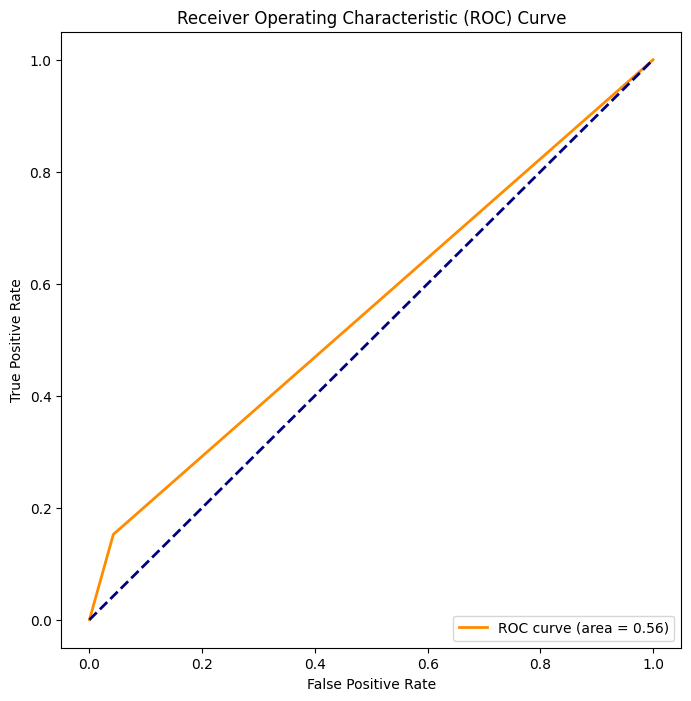

In [38]:
from sklearn.metrics import classification_report, roc_curve, auc

# Cross-validated predictions
final_predictions = voting_classifier.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, final_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to create deep learning model


# Wrap the Keras model as a scikit-learn estimator
keras_estimator = KerasClassifier(build_fn=create_deep_model, epochs=10, batch_size=32, verbose=0)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(keras_estimator, X_train, y_train, cv=cv, scoring=make_scorer(accuracy_score))

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    keras_estimator, X_train, y_train, cv=cv, scoring=make_scorer(accuracy_score), n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error i

Cross-Validation Scores: [0.8119891  0.80108992 0.83378747 0.80926431 0.80874317]
Mean CV Score: 0.8129747919179285


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the '

KeyboardInterrupt: 

In [40]:
corr_h1n1_df.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0,0
1,3.0,2.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,0,1
2,1.0,1.0,NaN,NaN,0.0,3.0,1.0,4.0,1.0,0,0
3,1.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,4.0,0,1
4,2.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,0,0


In [41]:
corr_h1n1_df=corr_h1n1_df.drop('seasonal_vaccine',axis=1)

In [42]:
corr_h1n1_df.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0
1,3.0,2.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,0
2,1.0,1.0,NaN,NaN,0.0,3.0,1.0,4.0,1.0,0
3,1.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,4.0,0
4,2.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,0


In [45]:
target_column = 'h1n1_vaccine'
corr_matrix = merged_df.corr()
corr_with_target = corr_matrix[target_column]
plt.figure(figsize=(120, 80))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=.5)
plt.title(f'Correlation Matrix with {target_column}')
plt.show()

In [46]:
corr_h1n1_df.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0
1,3.0,2.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,0
2,1.0,1.0,NaN,NaN,0.0,3.0,1.0,4.0,1.0,0
3,1.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,4.0,0
4,2.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,0


In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'h1n1_vaccine' is the target column
X = corr_h1n1_df.drop('h1n1_vaccine', axis=1)
y = corr_h1n1_df['h1n1_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBRegressor model
xgb_model = XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1236207082883269


In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'h1n1_vaccine' is the target column
X = corr_h1n1_df.drop('h1n1_vaccine', axis=1)
y = corr_h1n1_df['h1n1_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBClassifier model
xgb_model = XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8348932983901161
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4212
           1       0.66      0.45      0.53      1130

    accuracy                           0.83      5342
   macro avg       0.76      0.69      0.72      5342
weighted avg       0.82      0.83      0.82      5342

Confusion Matrix:
[[3956  256]
 [ 626  504]]


In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [50]:
corr_sf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_wash_hands        26665 non-null  float64
 3   behavioral_touch_face        26579 non-null  float64
 4   doctor_recc_h1n1             24547 non-null  float64
 5   doctor_recc_seasonal         24547 non-null  float64
 6   chronic_med_condition        25736 non-null  float64
 7   health_worker                25903 non-null  float64
 8   opinion_h1n1_vacc_effective  26316 non-null  float64
 9   opinion_h1n1_risk            26319 non-null  float64
 10  opinion_seas_vacc_effective  26245 non-null  float64
 11  opinion_seas_risk            26193 non-null  float64
 12  age_group                    26707 non-null  int64  
 13  race            

In [51]:
corr_sf_df=corr_sf_df.drop(['h1n1_concern','h1n1_knowledge','doctor_recc_h1n1','h1n1_vaccine'],axis=1)

In [52]:
corr_sf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_wash_hands        26665 non-null  float64
 1   behavioral_touch_face        26579 non-null  float64
 2   doctor_recc_seasonal         24547 non-null  float64
 3   chronic_med_condition        25736 non-null  float64
 4   health_worker                25903 non-null  float64
 5   opinion_h1n1_vacc_effective  26316 non-null  float64
 6   opinion_h1n1_risk            26319 non-null  float64
 7   opinion_seas_vacc_effective  26245 non-null  float64
 8   opinion_seas_risk            26193 non-null  float64
 9   age_group                    26707 non-null  int64  
 10  race                         26707 non-null  int64  
 11  household_children           26458 non-null  float64
 12  seasonal_vaccine             26707 non-null  int64  
dtypes: float64(10), 

In [56]:
corr_sf_df=corr_sf_df.dropna()

In [59]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'seasonal_vaccine' is the target column
X = corr_sf_df.drop(['seasonal_vaccine','opinion_h1n1_vacc_effective','opinion_h1n1_risk','age_group','race'], axis=1)
y = corr_sf_df['seasonal_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier()

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', random_forest_model), ('xgboost', xgb_model)],
    voting='soft'
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_classifier.predict(X_test)

# Evaluate the model performance
accuracy_voting = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {accuracy_voting}")

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', random_forest_model), ('xgboost', xgb_model)],
    final_estimator=LogisticRegression(),
    stack_method='auto',
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the model performance
accuracy_stacking = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")


Voting Classifier Accuracy: 0.7551760939167556
Stacking Classifier Accuracy: 0.7564567769477054


In [58]:
corr_sf_df.head()

,behavioral_wash_hands,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,age_group,race,household_children,seasonal_vaccine
0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,3,3,0.0,0
1,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,1,3,0.0,1
3,1.0,0.0,1.0,1.0,0.0,3.0,3.0,5.0,4.0,4,3,0.0,1
4,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,2,3,0.0,0
5,1.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,4.0,4,3,3.0,0


In [60]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Accuracy

# Assuming 'mergerd_df' is your DataFrame
# Assuming 'h1n1_vaccine' and 'seasonal_vaccine' are your target columns
merged_df=merged_df.dropna()
# Drop rows with missing values
df = merged_df.dropna(subset=['h1n1_vaccine', 'seasonal_vaccine'])

# Define features and target variables
X = df.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = df['h1n1_vaccine']
y_seasonal = df['seasonal_vaccine']

# Split the data into training and testing sets
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_h1n1 = scaler.fit_transform(X_train_h1n1)
X_test_h1n1 = scaler.transform(X_test_h1n1)
X_train_seasonal = scaler.fit_transform(X_train_seasonal)
X_test_seasonal = scaler.transform(X_test_seasonal)

# Define the deep learning model
def create_deep_model(input_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Accuracy()])
    return model

# Create and train the model for h1n1_vaccine
model_h1n1 = create_deep_model(X_train_h1n1.shape[1])
model_h1n1.fit(X_train_h1n1, y_train_h1n1, epochs=10, batch_size=32, validation_data=(X_test_h1n1, y_test_h1n1))

# Create and train the model for seasonal_vaccine
model_seasonal = create_deep_model(X_train_seasonal.shape[1])
model_seasonal.fit(X_train_seasonal, y_train_seasonal, epochs=10, batch_size=32, validation_data=(X_test_seasonal, y_test_seasonal))

# Evaluate models
accuracy_h1n1 = model_h1n1.evaluate(X_test_h1n1, y_test_h1n1)[1]
accuracy_seasonal = model_seasonal.evaluate(X_test_seasonal, y_test_seasonal)[1]

print(f"Accuracy for h1n1_vaccine: {accuracy_h1n1}")
print(f"Accuracy for seasonal_vaccine: {accuracy_seasonal}")


Epoch 1/10
575/575 [==============================] - 9s 14ms/step - loss: 0.5193 - accuracy: 0.0000e+00 - val_loss: 0.3956 - val_accuracy: 0.0000e+00
Epoch 2/10
575/575 [==============================] - 7s 12ms/step - loss: 1.9939 - accuracy: 0.0150 - val_loss: 1.6327 - val_accuracy: 0.0039
Epoch 3/10
575/575 [==============================] - 7s 12ms/step - loss: 147.1737 - accuracy: 0.5507 - val_loss: 140.6510 - val_accuracy: 0.7202
Epoch 4/10
575/575 [==============================] - 7s 12ms/step - loss: 493.8437 - accuracy: 0.6894 - val_loss: 648.8776 - val_accuracy: 0.6891
Epoch 5/10
575/575 [==============================] - 7s 12ms/step - loss: 1022.1044 - accuracy: 0.6971 - val_loss: 584.0309 - val_accuracy: 0.7476
Epoch 6/10
575/575 [==============================] - 7s 12ms/step - loss: 1450.4473 - accuracy: 0.7101 - val_loss: 409.4582 - val_accuracy: 0.8174
Epoch 7/10
575/575 [==============================] - 7s 12ms/step - loss: 1909.7084 - accuracy: 0.7206 - val_loss: 

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'merged_df'
# Drop 'respondent_id', 'h1n1_vaccine', and 'seasonal_vaccine' from features
features = merged_df.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)

# Fill missing values with mean (you may choose another imputation strategy)
features = features.fillna(features.mean())

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Split the data into train and test sets
X_train, X_test, y_h1n1_train, y_h1n1_test, y_seas_train, y_seas_test = train_test_split(
    features_standardized, merged_df['h1n1_vaccine'], merged_df['seasonal_vaccine'], test_size=0.2, random_state=42
)

# Apply PCA
pca = PCA(n_components=0.95)  # Choose the number of components that explain at least 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a model for h1n1_vaccine
model_h1n1 = RandomForestClassifier(random_state=42)
model_h1n1.fit(X_train_pca, y_h1n1_train)

# Predict and evaluate accuracy for h1n1_vaccine
y_h1n1_pred = model_h1n1.predict(X_test_pca)
accuracy_h1n1 = accuracy_score(y_h1n1_test, y_h1n1_pred)
print(f'Accuracy for h1n1_vaccine: {accuracy_h1n1}')

# Train a model for seasonal_vaccine
model_seas = RandomForestClassifier(random_state=42)
model_seas.fit(X_train_pca, y_seas_train)

# Predict and evaluate accuracy for seasonal_vaccine
y_seas_pred = model_seas.predict(X_test_pca)
accuracy_seas = accuracy_score(y_seas_test, y_seas_pred)
print(f'Accuracy for seasonal_vaccine: {accuracy_seas}')


Accuracy for h1n1_vaccine: 0.8228894691035683
Accuracy for seasonal_vaccine: 0.770017406440383


In [65]:
corr_h1n1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   doctor_recc_h1n1             24547 non-null  float64
 3   doctor_recc_seasonal         24547 non-null  float64
 4   health_worker                25903 non-null  float64
 5   opinion_h1n1_vacc_effective  26316 non-null  float64
 6   opinion_h1n1_risk            26319 non-null  float64
 7   opinion_seas_vacc_effective  26245 non-null  float64
 8   opinion_seas_risk            26193 non-null  float64
 9   h1n1_vaccine                 26707 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.0 MB


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'corr_h1n1_df'
features = corr_h1n1_df.drop('h1n1_vaccine', axis=1)
target = corr_h1n1_df['h1n1_vaccine']

# Fill missing values with mean (you may choose another imputation strategy)
features = features.fillna(features.mean())

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)  # Choose the number of components that explain at least 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train logistic regression model
model = (random_state=42)
model.fit(X_train_pca, y_train)

# Predict and evaluate accuracy
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for h1n1_vaccine prediction: {accuracy}')


Accuracy for h1n1_vaccine prediction: 0.8375140396855111
